In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install joypy

In [ ]:
# Importing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from joypy import joyplot

In [ ]:
milk_df = pd.read_csv("/content/drive/MyDrive/DAV sem 6/Milk_Production_2007_2012.csv")
milk_df = milk_df.set_index('States/Uts')
columns = [('Milk','2007-08'),('Milk','2008-09'),('Milk','2009-10'),('Milk','2010-11'),('Milk','2011-12')]
milk_df.columns = pd.MultiIndex.from_tuples(columns)
milk_df.head()

Milk                                
                  2007-08 2008-09 2009-10 2010-11 2011-12
States/Uts                                               
Andhra Pradesh       8925    9570   10429   11203   12088
Arunachal Pradesh      32      24      26      28      22
Assam                 752     753     756     790     796
Bihar                5783    5934    6124    6517    6643
Chhattisgarh          866     908     956    1029    1119

In [ ]:
egg_df = pd.read_csv("/content/drive/MyDrive/DAV sem 6/Egg_Production_2007_2012.csv")
egg_df.rename(columns = {'2007-08 (In lakh nos.)':'2007-2008',
                         '2008-09 (In lakh nos.)':'2008-2009',
                         '2009-10 (In lakh nos.)':'2009-2010',
                         '2010-11 (In lakh nos.)':'2010-2011',
                         '2011-12 (In lakh nos.)':'2011-2012'}, inplace = True)
egg_df = egg_df.set_index('States/Uts')
columns = [('Eggs','2007-2008'),('Eggs','2008-2009'),('Eggs','2009-2010'),('Eggs','2010-2011'),('Eggs','2011-2012')]
egg_df.columns = pd.MultiIndex.from_tuples(columns)
egg_df.head()

Eggs                                        
                  2007-2008 2008-2009 2009-2010 2010-2011 2011-2012
States/Uts                                                         
Andhra Pradesh       175884    183446    193958    201277    212103
Arunachal Pradesh       394       361       380       407       419
Assam                  4910      4659      4671      4707      4705
Bihar                 10707     10740     11002      7446      7552
Chhattisgarh           9184      9738     10520     12454     12984

In [ ]:
merged = milk_df.join(egg_df)
merged.head()

Milk                                      Eggs            \
                  2007-08 2008-09 2009-10 2010-11 2011-12 2007-2008 2008-2009   
States/Uts                                                                      
Andhra Pradesh       8925    9570   10429   11203   12088  175884.0  183446.0   
Arunachal Pradesh      32      24      26      28      22     394.0     361.0   
Assam                 752     753     756     790     796    4910.0    4659.0   
Bihar                5783    5934    6124    6517    6643   10707.0   10740.0   
Chhattisgarh          866     908     956    1029    1119    9184.0    9738.0   

                                                 
                  2009-2010 2010-2011 2011-2012  
States/Uts                                       
Andhra Pradesh     193958.0  201277.0  212103.0  
Arunachal Pradesh     380.0     407.0     419.0  
Assam                4671.0    4707.0    4705.0  
Bihar               11002.0    7446.0    7552.0  
Chhattisgarh        10520.0   12454.0   12984.0

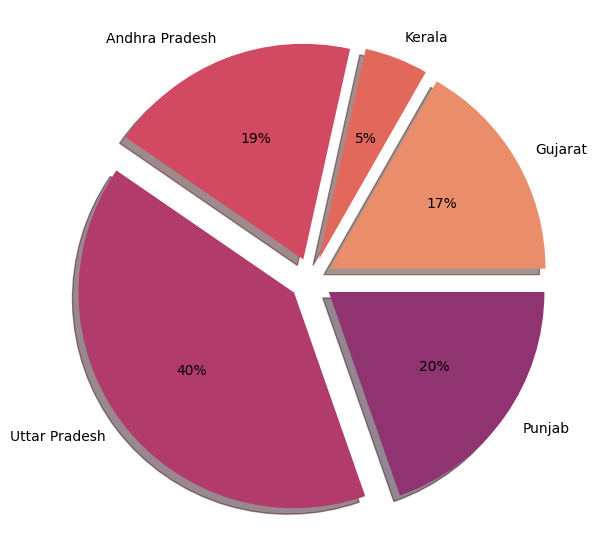

In [ ]:
q1 = merged.iloc[:,0:1]
states = ["Gujarat","Kerala","Andhra Pradesh","Uttar Pradesh","Punjab"]
q1 = q1.filter(items=states,axis=0)
q1 = q1.T
vals = q1.values.flatten()
label = q1.columns.tolist()
explode = [0.1,0.1,0.1,0.1,0.1]
colors = sns.color_palette('flare')[0:5]
plt.figure(figsize=(7,7))
plt.pie(vals, labels=label, autopct='%.0f%%', colors=colors, explode=explode, shadow = 'True')
plt.show()

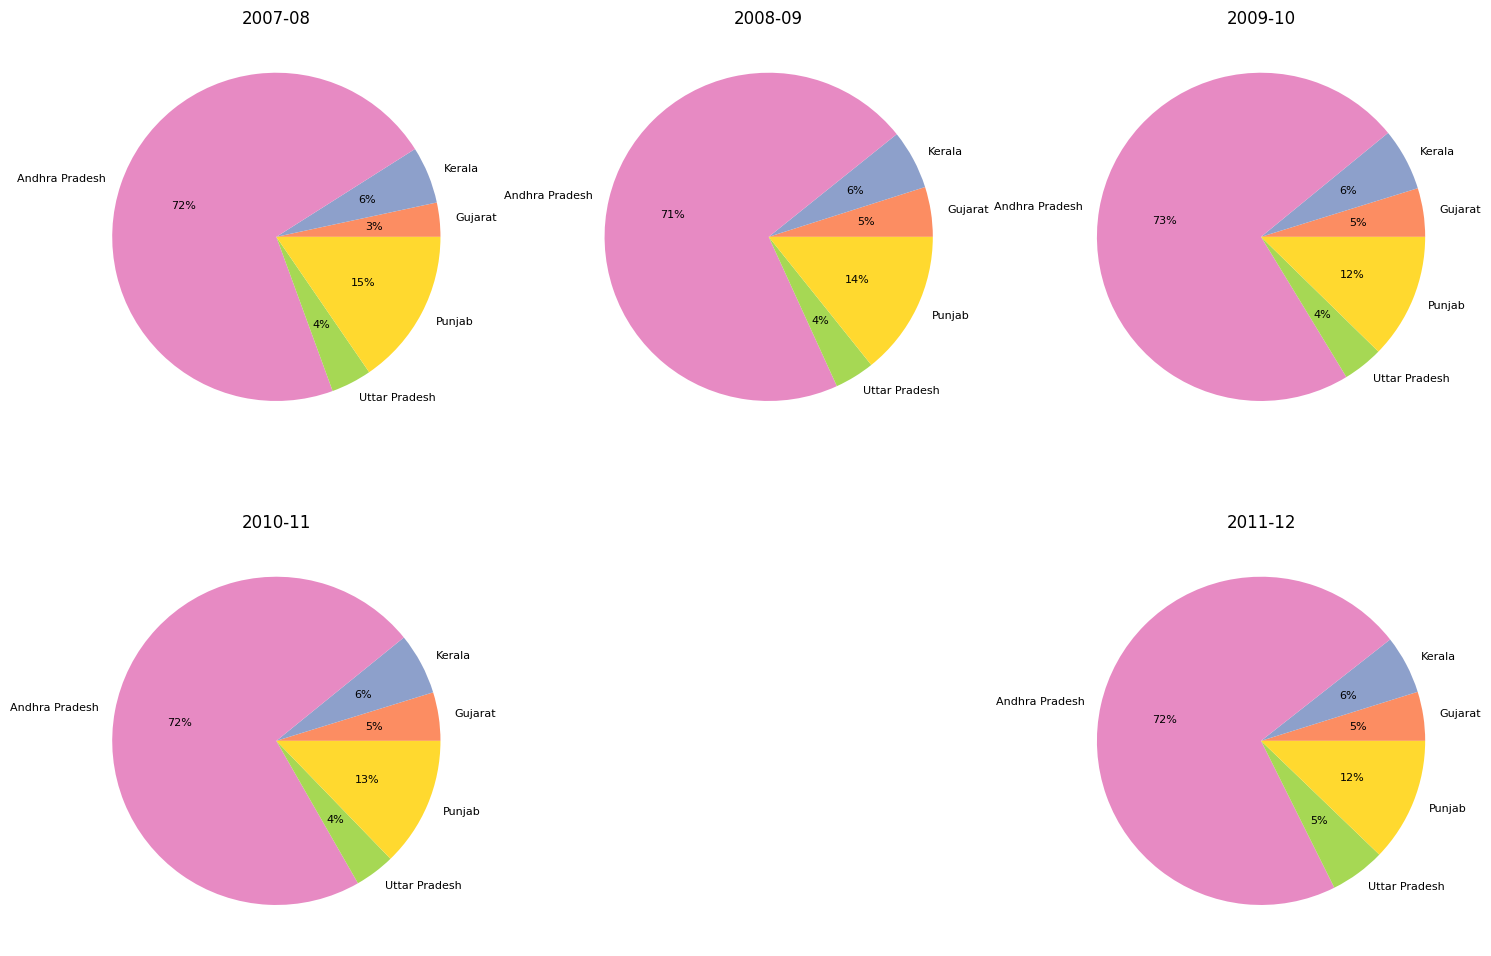

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(18,12), squeeze=True)
# q2 = egg_df.T.droplevel(['Eggs'])
q2 = egg_df.filter(items=states, axis=0)
q2 = q2.T
vals = q2.T.values
labels = ["Gujarat","Kerala","Andhra Pradesh","Uttar Pradesh","Punjab"]
fig.delaxes(axes[1][1])
colors = sns.color_palette("Set2")[1:6]
axes[0][0].pie(q2.loc[("Eggs","2007-2008")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[0,0].set_title("2007-08")
axes[0][1].pie(q2.loc[("Eggs","2008-2009")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[0,1].set_title("2008-09")
axes[0][2].pie(q2.loc[("Eggs","2009-2010")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[0,2].set_title("2009-10")
axes[1][0].pie(q2.loc[("Eggs","2010-2011")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[1,0].set_title("2010-11")
axes[1][2].pie(q2.loc[("Eggs","2011-2012")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[1,2].set_title("2011-12");

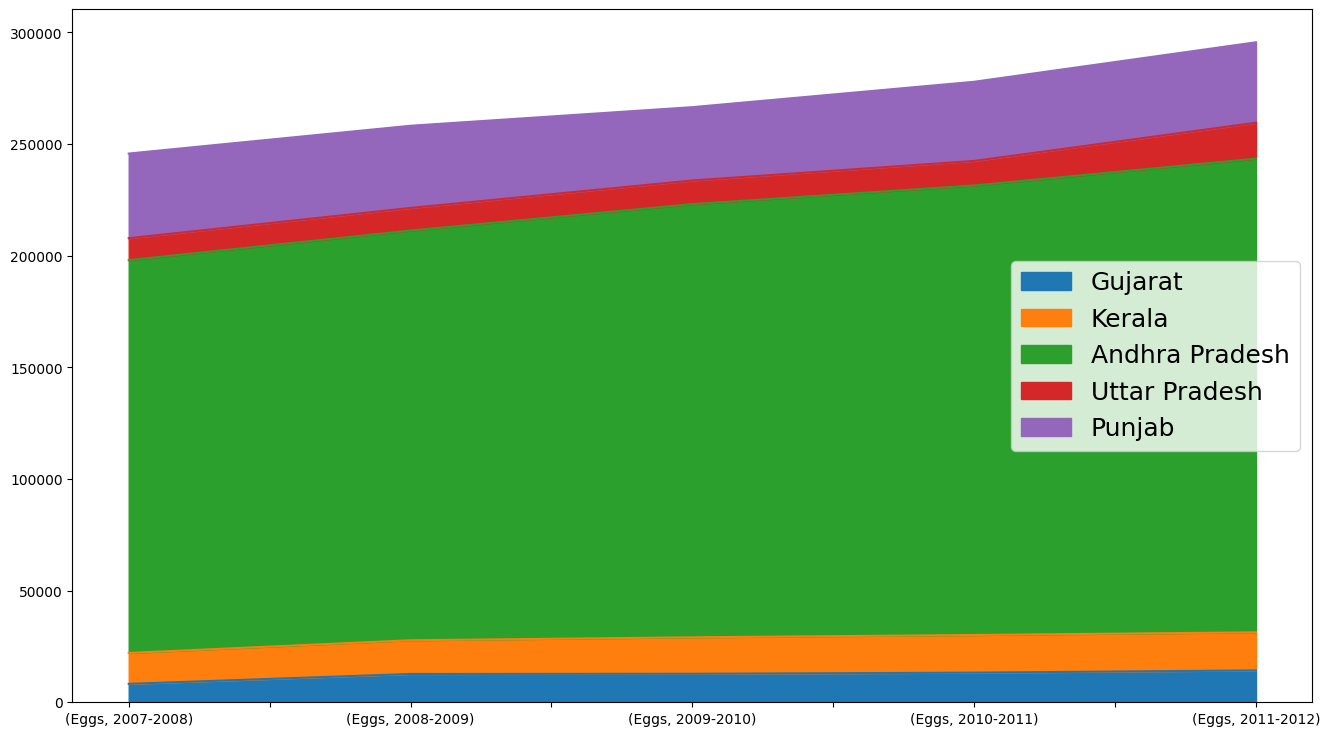

In [ ]:
q2.plot(kind='area', stacked=True, figsize=(16,9));
plt.legend(prop={'size':18});